In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split

import statsmodels.api as sm

# We are required to do this in order to avoid "FutureWarning" issues.
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [170]:
df = pd.read_csv('../data/interim/hdbsaledata.csv')
df_inf = pd.read_csv('../data/interim/inflation.csv')

c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [171]:
df_inf

,Variables,MAS Core Inflation Measure * (Index),Percent Change Over Corresponding Period Of Previous Year * (Per Cent),Services Inflation Measure (Index),Percent Change Over Corresponding Period Of Previous Year (Per Cent),Retail & Other Goods Inflation Measure (Index),Percent Change Over Corresponding Period Of Previous Year (Per Cent) .1,Electricity & Gas Inflation Measure (Index),Percent Change Over Corresponding Period Of Previous Year (Per Cent) .2
0,1990,62.094,na,na,na,na,na,na,na
1,1991,64.359,3.6,na,na,na,na,na,na
2,1992,65.398,1.6,na,na,na,na,na,na
3,1993,66.562,1.8,na,na,na,na,na,na
4,1994,68.246,2.5,na,na,na,na,na,na
5,1995,69.744,2.2,na,na,na,na,na,na
6,1996,70.997,1.8,na,na,na,na,na,na
7,1997,72.091,1.5,na,na,na,na,na,na
8,1998,72.376,0.4,na,na,na,na,na,na
9,1999,72.736,0.5,na,na,na,na,na,na


In [172]:
df_inf.columns = [columns.strip().lower() for columns in df_inf.columns]

In [173]:
df_inf.rename(columns = {'variables':'year', 'mas core inflation measure * (index)':'inflation_in_2019_dollars'}, inplace=True)

In [174]:
df_inf['year'] = df_inf['year'].astype(int)

In [175]:
df_inf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   year                                                                     31 non-null     int32  
 1   inflation_in_2019_dollars                                                31 non-null     float64
 2   percent change over corresponding period of previous year * (per cent)   31 non-null     object 
 3   services inflation measure (index)                                       31 non-null     object 
 4   percent change over corresponding period of previous year (per cent)     31 non-null     object 
 5   retail & other goods inflation measure (index)                           31 non-null     object 
 6   percent change over corresponding period of previous year (per cent) .1  31 n

In [176]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,full_address
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,NaN,Ang Mo Kio Avenue 4 Block 172 Singapore
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,NaN,Ang Mo Kio Avenue 8 Block 510 Singapore
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,NaN,Ang Mo Kio Avenue 4 Block 610 Singapore
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,NaN,Ang Mo Kio Avenue 10 Block 474 Singapore
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,NaN,Ang Mo Kio Avenue 5 Block 604 Singapore
...,...,...,...,...,...,...,...,...,...,...,...,...
179474,2021-01,YISHUN,EXECUTIVE,643,YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,590000.0,65 years 08 months,Yishun Street 61 Block 643 Singapore
179475,2021-01,YISHUN,EXECUTIVE,724,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,588000.0,64 years 07 months,Yishun Street 71 Block 724 Singapore
179476,2021-01,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,670000.0,66 years,Yishun Street 81 Block 834 Singapore
179477,2021-01,YISHUN,EXECUTIVE,877,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,690000.0,65 years 11 months,Yishun Street 81 Block 877 Singapore


In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179479 entries, 0 to 179478
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                179479 non-null  object 
 1   town                 179479 non-null  object 
 2   flat_type            179479 non-null  object 
 3   block                179479 non-null  object 
 4   street_name          179479 non-null  object 
 5   storey_range         179479 non-null  object 
 6   floor_area_sqm       179479 non-null  float64
 7   flat_model           179479 non-null  object 
 8   lease_commence_date  179479 non-null  int64  
 9   resale_price         179479 non-null  float64
 10  remaining_lease      127276 non-null  object 
 11  full_address         179479 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 16.4+ MB


In [178]:
df['year'] = df['month'].str[:4]

In [179]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,full_address,year
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,NaN,Ang Mo Kio Avenue 4 Block 172 Singapore,2012
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,NaN,Ang Mo Kio Avenue 8 Block 510 Singapore,2012
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,NaN,Ang Mo Kio Avenue 4 Block 610 Singapore,2012
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,NaN,Ang Mo Kio Avenue 10 Block 474 Singapore,2012
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,NaN,Ang Mo Kio Avenue 5 Block 604 Singapore,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179474,2021-01,YISHUN,EXECUTIVE,643,YISHUN ST 61,04 TO 06,146.0,Maisonette,1987,590000.0,65 years 08 months,Yishun Street 61 Block 643 Singapore,2021
179475,2021-01,YISHUN,EXECUTIVE,724,YISHUN ST 71,10 TO 12,146.0,Maisonette,1986,588000.0,64 years 07 months,Yishun Street 71 Block 724 Singapore,2021
179476,2021-01,YISHUN,EXECUTIVE,834,YISHUN ST 81,04 TO 06,142.0,Apartment,1988,670000.0,66 years,Yishun Street 81 Block 834 Singapore,2021
179477,2021-01,YISHUN,EXECUTIVE,877,YISHUN ST 81,07 TO 09,142.0,Apartment,1987,690000.0,65 years 11 months,Yishun Street 81 Block 877 Singapore,2021


# Move these  to the other notebook

In [8]:
df['flat_type'].value_counts()

4 ROOM              72642
3 ROOM              46908
5 ROOM              43146
EXECUTIVE           14316
2 ROOM               2305
1 ROOM                 94
MULTI-GENERATION       68
Name: flat_type, dtype: int64

In [180]:
dffour = df.loc[df['flat_type'] == '4 ROOM']
dffour.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,full_address,year
62,2012-03,ANG MO KIO,4 ROOM,218,ANG MO KIO AVE 1,01 TO 05,82.0,New Generation,1976,400000.0,NaN,Ang Mo Kio Avenue 1 Block 218 Singapore,2012
65,2012-03,ANG MO KIO,4 ROOM,601,ANG MO KIO AVE 5,01 TO 05,91.0,New Generation,1980,411000.0,NaN,Ang Mo Kio Avenue 5 Block 601 Singapore,2012
69,2012-03,ANG MO KIO,4 ROOM,108,ANG MO KIO AVE 4,06 TO 10,92.0,New Generation,1978,427000.0,NaN,Ang Mo Kio Avenue 4 Block 108 Singapore,2012
71,2012-03,ANG MO KIO,4 ROOM,105,ANG MO KIO AVE 4,06 TO 10,92.0,New Generation,1978,430000.0,NaN,Ang Mo Kio Avenue 4 Block 105 Singapore,2012
72,2012-03,ANG MO KIO,4 ROOM,438,ANG MO KIO AVE 10,06 TO 10,92.0,New Generation,1979,433000.0,NaN,Ang Mo Kio Avenue 10 Block 438 Singapore,2012


In [181]:
dffour = dffour.groupby('month').mean()

In [182]:
dffour = dffour.reset_index()

In [183]:
dffour['year'] = dffour['month'].str[:4].astype(int)

In [184]:
dffour = dffour.loc[dffour['year'] < 2021]

In [185]:
dffour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106 entries, 0 to 105
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   month                106 non-null    object 
 1   floor_area_sqm       106 non-null    float64
 2   lease_commence_date  106 non-null    float64
 3   resale_price         106 non-null    float64
 4   year                 106 non-null    int32  
dtypes: float64(3), int32(1), object(1)
memory usage: 4.6+ KB


In [186]:
dffinal = pd.merge(dffour, df_inf[['year', 'inflation_in_2019_dollars']], on='year')

In [187]:
dffinal

,month,floor_area_sqm,lease_commence_date,resale_price,year,inflation_in_2019_dollars
0,2012-03,96.662324,1992.028230,450677.327774,2012,91.238
1,2012-04,95.903529,1992.312941,446957.632941,2012,91.238
2,2012-05,95.566120,1991.877596,453255.604372,2012,91.238
3,2012-06,96.187214,1991.580081,450759.477793,2012,91.238
4,2012-07,96.289377,1991.637363,452274.967033,2012,91.238
...,...,...,...,...,...,...
101,2020-08,94.732033,2000.550308,443731.230883,2020,99.845
102,2020-09,94.747628,1999.789374,453976.722960,2020,99.845
103,2020-10,94.547076,2000.646184,471009.688801,2020,99.845
104,2020-11,94.804504,1999.557830,466099.160696,2020,99.845


In [188]:
dffinal['resale_price_inf_adj'] = dffinal['resale_price'] * dffinal['inflation_in_2019_dollars']/100

In [189]:
dffinal

,month,floor_area_sqm,lease_commence_date,resale_price,year,inflation_in_2019_dollars,resale_price_inf_adj
0,2012-03,96.662324,1992.028230,450677.327774,2012,91.238,411188.980315
1,2012-04,95.903529,1992.312941,446957.632941,2012,91.238,407795.205143
2,2012-05,95.566120,1991.877596,453255.604372,2012,91.238,413541.348317
3,2012-06,96.187214,1991.580081,450759.477793,2012,91.238,411263.932349
4,2012-07,96.289377,1991.637363,452274.967033,2012,91.238,412646.634422
...,...,...,...,...,...,...,...
101,2020-08,94.732033,2000.550308,443731.230883,2020,99.845,443043.447475
102,2020-09,94.747628,1999.789374,453976.722960,2020,99.845,453273.059040
103,2020-10,94.547076,2000.646184,471009.688801,2020,99.845,470279.623783
104,2020-11,94.804504,1999.557830,466099.160696,2020,99.845,465376.706997


# Arima

In [190]:
df = dffinal

In [194]:
df['month'] = pd.to_datetime(df['month'], format = '%Y-%m')

In [196]:
df

,month,floor_area_sqm,lease_commence_date,resale_price,year,inflation_in_2019_dollars,resale_price_inf_adj
0,2012-03-01,96.662324,1992.028230,450677.327774,2012,91.238,411188.980315
1,2012-04-01,95.903529,1992.312941,446957.632941,2012,91.238,407795.205143
2,2012-05-01,95.566120,1991.877596,453255.604372,2012,91.238,413541.348317
3,2012-06-01,96.187214,1991.580081,450759.477793,2012,91.238,411263.932349
4,2012-07-01,96.289377,1991.637363,452274.967033,2012,91.238,412646.634422
...,...,...,...,...,...,...,...
101,2020-08-01,94.732033,2000.550308,443731.230883,2020,99.845,443043.447475
102,2020-09-01,94.747628,1999.789374,453976.722960,2020,99.845,453273.059040
103,2020-10-01,94.547076,2000.646184,471009.688801,2020,99.845,470279.623783
104,2020-11-01,94.804504,1999.557830,466099.160696,2020,99.845,465376.706997


In [197]:
df.set_index(pd.DatetimeIndex(df['month']),inplace=True)

In [198]:
df.head()

,month,floor_area_sqm,lease_commence_date,resale_price,year,inflation_in_2019_dollars,resale_price_inf_adj
month,,,,,,,
2012-03-01,2012-03-01,96.662324,1992.028230,450677.327774,2012,91.238,411188.980315
2012-04-01,2012-04-01,95.903529,1992.312941,446957.632941,2012,91.238,407795.205143
2012-05-01,2012-05-01,95.566120,1991.877596,453255.604372,2012,91.238,413541.348317
2012-06-01,2012-06-01,96.187214,1991.580081,450759.477793,2012,91.238,411263.932349
2012-07-01,2012-07-01,96.289377,1991.637363,452274.967033,2012,91.238,412646.634422


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 106 entries, 2012-03 to 2020-12
Freq: M
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   floor_area_sqm             106 non-null    float64
 1   lease_commence_date        106 non-null    float64
 2   resale_price               106 non-null    float64
 3   year                       106 non-null    int32  
 4   inflation_in_2019_dollars  106 non-null    float64
 5   resale_price_inf_adj       106 non-null    float64
 6   firstdiff_prices           105 non-null    float64
 7   firstdif_prices            105 non-null    float64
 8   seconddif_prices           104 non-null    float64
dtypes: float64(8), int32(1)
memory usage: 7.9 KB


In [158]:
def plot_series(df, cols=None, title='Title', xlab=None, ylab=None, steps=1):
    
    # Set figure size to be (18, 9).
    plt.figure(figsize=(18,9))
    
    # Iterate through each column name.
    for col in cols:
            
        # Generate a line plot of the column name.
        # You only have to specify Y, since our
        # index will be a datetime index.
        plt.plot(df[col])
        
    # Generate title and labels.
    plt.title(title, fontsize=26)
    plt.xlabel(xlab, fontsize=20)
    plt.ylabel(ylab, fontsize=20)
    
    # Enlarge tick marks.
    plt.yticks(fontsize=18)
    plt.xticks(df.index[0::steps], fontsize=18);

In [199]:
df.index

DatetimeIndex(['2012-03-01', '2012-04-01', '2012-05-01', '2012-06-01',
               '2012-07-01', '2012-08-01', '2012-09-01', '2012-10-01',
               '2012-11-01', '2012-12-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', name='month', length=106, freq=None)

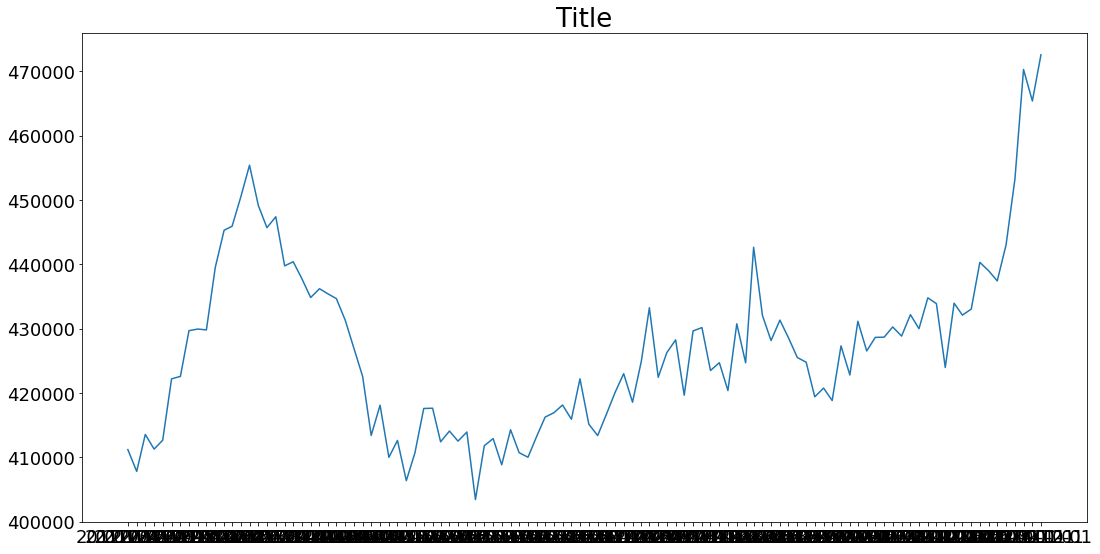

In [200]:
plot_series(df, ['resale_price_inf_adj'])

# Arima Differencing

In [201]:
df['firstdif_prices'] = df['resale_price_inf_adj'].diff(1)

In [202]:
df['seconddif_prices'] = df['resale_price_inf_adj'].diff(1).diff(1)

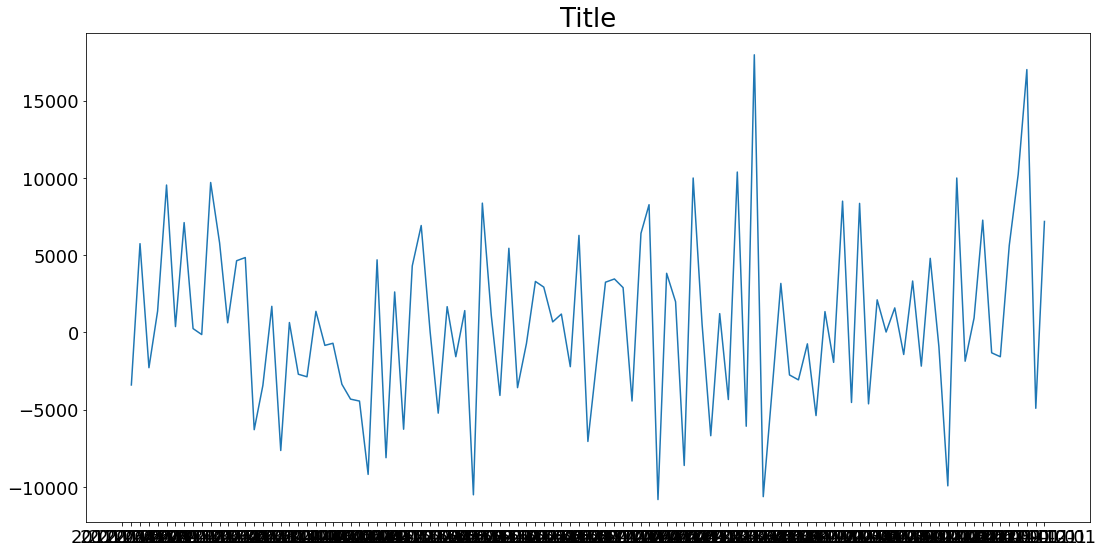

In [203]:
plot_series(df, ['firstdif_prices'])

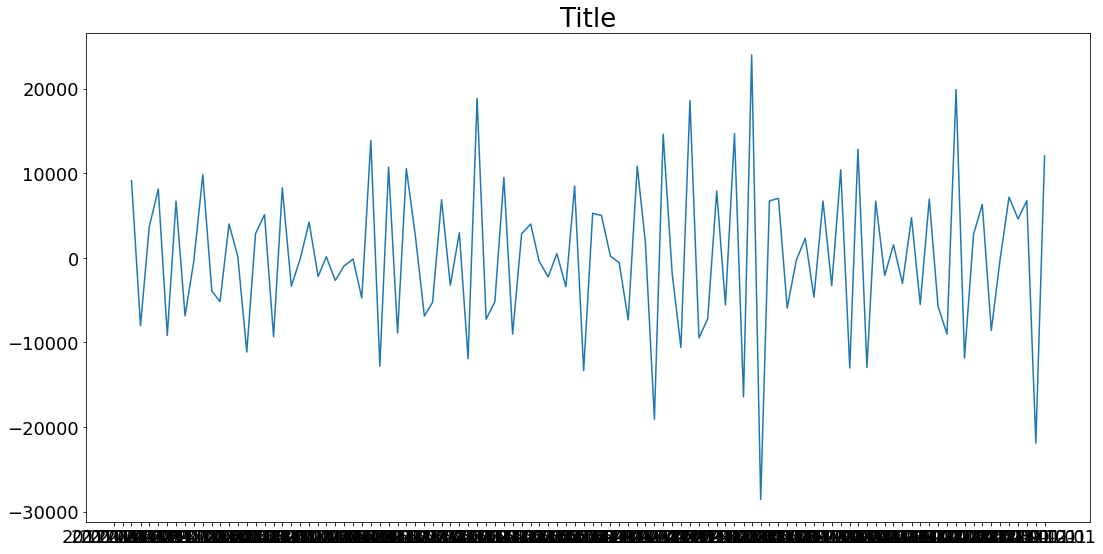

In [204]:
plot_series(df, ['seconddif_prices'])

In [205]:
from statsmodels.tsa.stattools import adfuller

In [206]:
df1 = df.dropna()

In [207]:
def interpret_dftest(dftest):
    dfoutput = pd.Series(dftest[0:2], index=['Test Statistic','p-value'])
    return dfoutput

In [208]:
interpret_dftest(adfuller(df1['firstdif_prices']))

Test Statistic   -1.356184e+01
p-value           2.302091e-25
dtype: float64

In [209]:
interpret_dftest(adfuller(df1['seconddif_prices']))

Test Statistic   -4.945292
p-value           0.000028
dtype: float64

first order is stationary enough

In [210]:
y_train, y_test = train_test_split(df['firstdif_prices'],
                                   test_size = 0.1,
                                   shuffle = False)

In [211]:
from statsmodels.tsa.arima.model import ARIMA

In [212]:
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):
        
        # Insert try and except statements.
        try:
            
            # Fitting an ARIMA(p, 1, q) model.
            print(f'Attempting to fit ARIMA({p},1,{q})')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog = y_train.astype(float).dropna(), # endog = Y variable
                          order = (p,1,q)) # values of p, d, q
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 1, q) model.
            print(f'The AIC for ARIMA({p},1,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

        except:
            pass
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA({best_p},1,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA(0,1,0)
The AIC for ARIMA(0,1,0) is: 1956.1885889846023
Attempting to fit ARIMA(0,1,1)
The AIC for ARIMA(0,1,1) is: 1871.2999404348523
Attempting to fit ARIMA(0,1,2)
The AIC for ARIMA(0,1,2) is: 1863.5281858683131
Attempting to fit ARIMA(0,1,3)
The AIC for ARIMA(0,1,3) is: 1860.5770790466095
Attempting to fit ARIMA(0,1,4)
The AIC for ARIMA(0,1,4) is: 1862.2831046681265
Attempting to fit ARIMA(1,1,0)
The AIC for ARIMA(1,1,0) is: 1900.7531331865782
Attempting to fit ARIMA(1,1,1)
The AIC for ARIMA(1,1,1) is: 1861.344392759
Attempting to fit ARIMA(1,1,2)


c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency infor

The AIC for ARIMA(1,1,2) is: 1863.584384156052
Attempting to fit ARIMA(1,1,3)
The AIC for ARIMA(1,1,3) is: 1861.670279554738
Attempting to fit ARIMA(1,1,4)
The AIC for ARIMA(1,1,4) is: 1862.8152169773143
Attempting to fit ARIMA(2,1,0)
The AIC for ARIMA(2,1,0) is: 1873.8477672266317
Attempting to fit ARIMA(2,1,1)
The AIC for ARIMA(2,1,1) is: 1863.0795405857086
Attempting to fit ARIMA(2,1,2)


c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency infor

The AIC for ARIMA(2,1,2) is: 1864.2907291556594
Attempting to fit ARIMA(2,1,3)
The AIC for ARIMA(2,1,3) is: 1863.2334088843288
Attempting to fit ARIMA(2,1,4)
The AIC for ARIMA(2,1,4) is: 1864.8056559100949
Attempting to fit ARIMA(3,1,0)
The AIC for ARIMA(3,1,0) is: 1869.7649897323424
Attempting to fit ARIMA(3,1,1)
The AIC for ARIMA(3,1,1) is: 1861.713778808994
Attempting to fit ARIMA(3,1,2)
The AIC for ARIMA(3,1,2) is: 1862.9802339396415
Attempting to fit ARIMA(3,1,3)


c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency infor

The AIC for ARIMA(3,1,3) is: 1864.6837686844158
Attempting to fit ARIMA(3,1,4)


c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

The AIC for ARIMA(3,1,4) is: 1866.5879532146425
Attempting to fit ARIMA(4,1,0)
The AIC for ARIMA(4,1,0) is: 1870.0275482170475
Attempting to fit ARIMA(4,1,1)
The AIC for ARIMA(4,1,1) is: 1863.0599825915322
Attempting to fit ARIMA(4,1,2)
The AIC for ARIMA(4,1,2) is: 1864.0183690416222
Attempting to fit ARIMA(4,1,3)


c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency infor

The AIC for ARIMA(4,1,3) is: 1866.1701441067207
Attempting to fit ARIMA(4,1,4)
The AIC for ARIMA(4,1,4) is: 1865.6760350322193


MODEL FINISHED!
Our model that minimizes AIC on the training data is the ARIMA(0,1,3).
This model has an AIC of 1860.5770790466095.


c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency i

In [213]:
y_test.index[0]

Timestamp('2020-02-01 00:00:00')

In [214]:
# Instantiate best model.
model = ARIMA(endog = y_train.astype(float).dropna(), # endog = Y variable
              order = (0,1,3))

# Fit ARIMA model.
arima = model.fit()

c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
c:\users\dylanlee\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [218]:
vars(arima)

{'_results': <statsmodels.tsa.arima.model.ARIMAResults at 0x1b652897b80>,
 '__doc__': '\nClass to hold results from fitting an SARIMAX model.\n\nParameters\n----------\nmodel : SARIMAX instance\n    The fitted model instance\n\nAttributes\n----------\nspecification : dictionary\n    Dictionary including all attributes from the SARIMAX model instance.\npolynomial_ar : ndarray\n    Array containing autoregressive lag polynomial coefficients,\n    ordered from lowest degree to highest. Initialized with ones, unless\n    a coefficient is constrained to be zero (in which case it is zero).\npolynomial_ma : ndarray\n    Array containing moving average lag polynomial coefficients,\n    ordered from lowest degree to highest. Initialized with ones, unless\n    a coefficient is constrained to be zero (in which case it is zero).\npolynomial_seasonal_ar : ndarray\n    Array containing seasonal autoregressive lag polynomial coefficients,\n    ordered from lowest degree to highest. Initialized with o

In [279]:
arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:        firstdif_prices   No. Observations:                   94
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -926.289
Date:                Wed, 03 Mar 2021   AIC                           1860.577
Time:                        02:32:36   BIC                           1870.707
Sample:                    04-01-2012   HQIC                          1864.667
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.3924      0.197     -7.072      0.000      -1.778      -1.006
ma.L2          0.6823      0.214      3.192      0.001       0.263       1.101
ma.L3         -0.2823      0.124     -2.270      0.023      -0.526      -0.039
sigma2      2.889e+07   6.45e-09   4.48e+15      0.000    2.89e+07    2.89e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):                 0.79
Prob(Q):                              0.83   Prob(JB):                         0.67
Heteroskedasticity (H):               1.23   Skew:                             0.23
Prob(H) (two-sided):                  0.57   Kurtosis:                         2.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.51e+31. Standard errors may be unstable.
"""

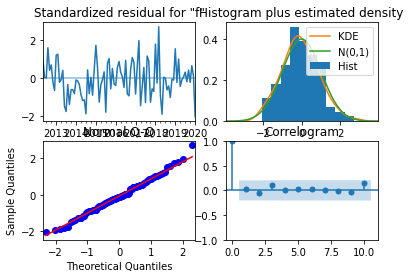

In [280]:
arima.plot_diagnostics()
plt.show()

In [281]:
y_test

month
2020-02-01     9992.774196
2020-03-01    -1857.664856
2020-04-01      937.907036
2020-05-01     7267.139191
2020-06-01    -1314.014990
2020-07-01    -1568.260376
2020-08-01     5630.635028
2020-09-01    10229.611564
2020-10-01    17006.564744
2020-11-01    -4902.916786
2020-12-01     7182.141963
Name: firstdif_prices, dtype: float64

In [282]:
pred = arima.get_prediction(start=pd.to_datetime('2019-01-01'),end=pd.to_datetime('2020-01-01'),dynamic=False)
pred_ci = pred.conf_int()

In [283]:
pred_ci

,lower firstdif_prices,upper firstdif_prices
2019-01-01,-10337.777834,10787.676616
2019-02-01,-13856.046732,7268.122412
2019-03-01,-7588.200332,13534.718877
2019-04-01,-12831.130855,8290.572525
2019-05-01,-7917.447321,13203.073134
2019-06-01,-10817.057181,10302.312102
2019-07-01,-10629.879920,10488.368843
2019-08-01,-10929.147068,10188.010782
2019-09-01,-9471.204263,11644.891275
2019-10-01,-11523.112559,9591.948309


In [284]:
pred

In [285]:
y_train['2018':'2019']

month
2018-01-01    10379.105003
2018-02-01    -6063.628485
2018-03-01    17962.251680
2018-04-01   -10619.061061
2018-05-01    -3881.186595
2018-06-01     3174.324746
2018-07-01    -2746.139371
2018-08-01    -3064.206640
2018-09-01     -734.032008
2018-10-01    -5374.038623
2018-11-01     1351.055500
2018-12-01    -1931.155265
2019-01-01     8495.910468
2019-02-01    -4526.799082
2019-03-01     8351.619005
2019-04-01    -4615.533517
2019-05-01     2112.319232
2019-06-01       29.444188
2019-07-01     1590.184398
2019-08-01    -1422.395601
2019-09-01     3329.897254
2019-10-01    -2175.280919
2019-11-01     4796.234368
2019-12-01     -907.706982
Name: firstdif_prices, dtype: float64

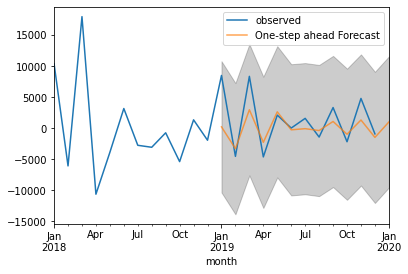

In [286]:
# source: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
ax = y_train['2018':'2019'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)


plt.legend()

plt.show()


In [287]:
y_forecasted = pred.predicted_mean
y_truth = y_train['2019']

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 10620470.74


In [105]:
df

,month,floor_area_sqm,lease_commence_date,resale_price,year,inflation_in_2019_dollars,resale_price_inf_adj,firstdiff_prices,firstdif_prices,seconddif_prices
0,2012-03-01,96.662324,1992.028230,450677.327774,2012,91.238,411188.980315,NaN,NaN,NaN
1,2012-04-01,95.903529,1992.312941,446957.632941,2012,91.238,407795.205143,-3393.775172,-3393.775172,NaN
2,2012-05-01,95.566120,1991.877596,453255.604372,2012,91.238,413541.348317,5746.143174,5746.143174,9139.918345
3,2012-06-01,96.187214,1991.580081,450759.477793,2012,91.238,411263.932349,-2277.415968,-2277.415968,-8023.559142
4,2012-07-01,96.289377,1991.637363,452274.967033,2012,91.238,412646.634422,1382.702073,1382.702073,3660.118041
...,...,...,...,...,...,...,...,...,...,...
101,2020-08-01,94.732033,2000.550308,443731.230883,2020,99.845,443043.447475,5630.635028,5630.635028,7198.895404
102,2020-09-01,94.747628,1999.789374,453976.722960,2020,99.845,453273.059040,10229.611564,10229.611564,4598.976537
103,2020-10-01,94.547076,2000.646184,471009.688801,2020,99.845,470279.623783,17006.564744,17006.564744,6776.953179
104,2020-11-01,94.804504,1999.557830,466099.160696,2020,99.845,465376.706997,-4902.916786,-4902.916786,-21909.481530
